# MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scikitplot as skplt
%matplotlib inline
import cloudpickle

from sklearn.model_selection import train_test_split

#    from sklearn.linear_model import LogisticRegression
#    from sklearn.ensemble import RandomForestClassifier
#    from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics
#    from sklearn.metrics.pairwise import cosine_similarity

#    from sklearn.model_selection import GridSearchCV
#    from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import plot_precision_recall_curve
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

import os
import re
import unidecode
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [82]:
ruta_proyecto = 'C:/Users/Usuario/OneDrive/Documentos/Proyecto Saturdays AI/SAI Dia FBS/'

Nombres de los ficheros de datos.

In [83]:
nombre = 'df_transf.pickle'

Cargar los datos.

In [84]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre)
df.head()

,index,id,cno,titulo_oferta,detalle_oferta,empresa_oferta,categoria
0,9,1764985510,5120,camarero experiencia,camarero experiencia jornada completa turnos r...,MARINELA LIVIA CUREAN,hosteleria turismo camareros camareros asalari...
1,41,1764789141,5120,camarero,servicio sala restaurante,LERA GASTRO S.L.,hosteleria turismo camareros camareros asalari...
2,46,1764638874,5120,camarera,persona responsable puesto camarera experienci...,THE PHONE STORE SL,hosteleria turismo camareros camareros asalari...
3,51,1764094498,5120,camarero ingles barra sala,camarero ingles barra sala,PBUK BALSICAS SL,hosteleria turismo camareros camareros asalari...
4,71,1766018611,5120,ayudante camarero,participar alguna autonomia responsabilidad se...,HOTEL PALMERAS S.A.U,hosteleria turismo camareros camareros asalari...


## MODELIZAR

#### VECTORIZACIÓN DE TEXTOS

In [85]:
# Vectorizar los textos. 

Text = df['detalle_oferta'].values
Target = df['cno'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    #stop_words='english',
    max_features=1500)
word_vectorizer.fit(Text)
WordFeatures = word_vectorizer.transform(Text)

### Reservar el dataset de validacion

In [86]:
# Realizamos el la separación nuestro conjunto de datos en Train (80%) y Test(20%)

train_x, test_x, train_y, test_y = train_test_split(WordFeatures, Target, random_state=24, test_size=0.2)

In [87]:
# Creamos el modelo y lo entrenamos

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(train_x, train_y)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [88]:
model_GBM = OneVsRestClassifier(GradientBoostingClassifier())

model_GBM.fit(train_x, train_y)

OneVsRestClassifier(estimator=GradientBoostingClassifier())

In [89]:
nombre_model_ejecucion = 'model_GBM.pkl'

In [90]:
ruta_model_ejecucion = ruta_proyecto + '/04_Modelos/' + nombre_model_ejecucion
with open(ruta_model_ejecucion, mode='wb') as file:
    cloudpickle.dump(model_GBM, file)

In [91]:
# model_HGBM = HistGradientBoostingClassifier()

# model_HGBM.fit(train_x, train_y)

In [92]:
train_y

array(['3811', '5120', '3820', '5120', '5120', '3820', '3811', '3811',
       '5120', '5120', '5120', '3811', '3811', '3820', '2461', '2461',
       '3811', '3811', '5120', '2461', '3811', '2461', '3820', '5120',
       '2461', '2461', '2461', '5120', '2461', '5120', '3811', '3811',
       '3820', '2461', '3811', '2461', '3811', '2461', '3811', '2461',
       '3811', '5120', '5120', '3820', '3811', '3811', '2461', '3811',
       '3820', '3811', '5120', '3820', '3811', '3811', '5120', '2461',
       '5120', '3811', '3811', '2461', '2461', '3820', '3811', '3811',
       '3820', '2461', '3811', '3811', '3811', '3820', '2461', '5120',
       '3811', '2461', '3811', '3811', '5120', '3820', '3811', '3811',
       '3811', '5120', '5120', '2461', '5120', '3811', '2461', '3811',
       '3811', '5120', '5120', '5120', '3811', '3811', '3811', '3811',
       '2461', '3820', '5120', '3820', '3811', '3811', '5120', '3811',
       '3820', '3811', '2461', '2461', '3820', '2461', '5120', '3811',
      

In [85]:
# Realizamos la prediccón para los datos de prueba

pred_y = model.predict(test_x)

In [86]:
pred_y_GBM = model_GBM.predict(test_x)

In [87]:
# Obtenemos el accuracy de nuestro modelo en los datos de entrenamiento y de prueba

print(f'---------------------------------\n| Training Accuracy   : {(model.score(train_x, train_y)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy : {(model.score(test_x, test_y)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy   : 88.65% |
---------------------------------
| Validation Accuracy : 78.38% |
---------------------------------


In [88]:
# Obtenemos el accuracy de nuestro modelo en los datos de entrenamiento y de prueba

print(f'---------------------------------\n| Training Accuracy GBM   : {(model_GBM.score(train_x, train_y)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy GBM : {(model_GBM.score(test_x, test_y)*100).round(2)}% |\n---------------------------------')

---------------------------------
| Training Accuracy GBM   : 99.86% |
---------------------------------
| Validation Accuracy GBM : 85.41% |
---------------------------------


In [89]:
# Obtenemos conjunto de métricas para nuestro modelo. 

print("\n Classification report for classifier %s:\n%s\n" % (model_GBM, metrics.classification_report(test_y, pred_y)))


 Classification report for classifier OneVsRestClassifier(estimator=GradientBoostingClassifier()):
              precision    recall  f1-score   support

        2461       0.92      0.90      0.91        40
        3811       0.88      0.62      0.73        73
        3820       0.57      0.86      0.69        43
        5120       0.90      0.93      0.92        29

    accuracy                           0.78       185
   macro avg       0.82      0.83      0.81       185
weighted avg       0.82      0.78      0.79       185




In [90]:
# Obtenemos conjunto de métricas para nuestro modelo. 

print("\n Classification report for classifier %s:\n%s\n" % (model_GBM, metrics.classification_report(test_y, pred_y_GBM)))


 Classification report for classifier OneVsRestClassifier(estimator=GradientBoostingClassifier()):
              precision    recall  f1-score   support

        2461       0.97      0.90      0.94        40
        3811       0.78      0.89      0.83        73
        3820       0.80      0.74      0.77        43
        5120       1.00      0.86      0.93        29

    accuracy                           0.85       185
   macro avg       0.89      0.85      0.87       185
weighted avg       0.86      0.85      0.86       185




### Predición de CNO sobre un nueva entrada de datos. 

In [91]:
stop_words_spanish = ['de',
'la',
'que',
'el',
'en',
'y',
'a',
'los',
'del',
'se',
'las',
'por',
'un',
'para',
'con',
'no',
'una',
'su',
'al',
'lo',
'como',
'más',
'pero',
'sus',
'le',
'ya',
'o',
'este',
'sí',
'porque',
'esta',
'entre',
'cuando',
'muy',
'sin',
'sobre',
'también',
'me',
'hasta',
'hay',
'donde',
'quien',
'desde',
'todo',
'nos',
'durante',
'todos',
'uno',
'les',
'ni',
'contra',
'otros',
'ese',
'eso',
'ante',
'ellos',
'e',
'esto',
'mí',
'antes',
'algunos',
'qué',
'unos',
'yo',
'otro',
'otras',
'otra',
'él',
'tanto',
'esa',
'estos',
'mucho',
'quienes',
'nada',
'muchos',
'cual',
'poco',
'ella',
'estar',
'estas',
'algunas',
'algo',
'nosotros',
'mi',
'mis',
'tú',
'te',
'ti',
'tu',
'tus',
'ellas',
'nosotras',
'vosostros',
'vosostras',
'os',
'mío',
'mía',
'míos',
'mías',
'tuyo',
'tuya',
'tuyos',
'tuyas',
'suyo',
'suya',
'suyos',
'suyas',
'nuestro',
'nuestra',
'nuestros',
'nuestras',
'vuestro',
'vuestra',
'vuestros',
'vuestras',
'esos',
'esas',
'estoy',
'estás',
'está',
'estamos',
'estáis',
'están',
'esté',
'estés',
'estemos',
'estéis',
'estén',
'estaré',
'estarás',
'estará',
'estaremos',
'estaréis',
'estarán',
'estaría',
'estarías',
'estaríamos',
'estaríais',
'estarían',
'estaba',
'estabas',
'estábamos',
'estabais',
'estaban',
'estuve',
'estuviste',
'estuvo',
'estuvimos',
'estuvisteis',
'estuvieron',
'estuviera',
'estuvieras',
'estuviéramos',
'estuvierais',
'estuvieran',
'estuviese',
'estuvieses',
'estuviésemos',
'estuvieseis',
'estuviesen',
'estando',
'estado',
'estada',
'estados',
'estadas',
'estad',
'he',
'has',
'ha',
'hemos',
'habéis',
'han',
'haya',
'hayas',
'hayamos',
'hayáis',
'hayan',
'habré',
'habrás',
'habrá',
'habremos',
'habréis',
'habrán',
'habría',
'habrías',
'habríamos',
'habríais',
'habrían',
'había',
'habías',
'habíamos',
'habíais',
'habían',
'hube',
'hubiste',
'hubo',
'hubimos',
'hubisteis',
'hubieron',
'hubiera',
'hubieras',
'hubiéramos',
'hubierais',
'hubieran',
'hubiese',
'hubieses',
'hubiésemos',
'hubieseis',
'hubiesen',
'habiendo',
'habido',
'habida',
'habidos',
'habidas',
'soy',
'eres',
'es',
'somos',
'sois',
'son',
'sea',
'seas',
'seamos',
'seáis',
'sean',
'seré',
'serás',
'será',
'seremos',
'seréis',
'serán',
'sería',
'serías',
'seríamos',
'seríais',
'serían',
'era',
'eras',
'éramos',
'erais',
'eran',
'fui',
'fuiste',
'fue',
'fuimos',
'fuisteis',
'fueron',
'fuera',
'fueras',
'fuéramos',
'fuerais',
'fueran',
'fuese',
'fueses',
'fuésemos',
'fueseis',
'fuesen',
'sintiendo',
'sentido',
'sentida',
'sentidos',
'sentidas',
'siente',
'sentid',
'tengo',
'tienes',
'tiene',
'tenemos',
'tenéis',
'tienen',
'tenga',
'tengas',
'tengamos',
'tengáis',
'tengan',
'tendré',
'tendrás',
'tendrá',
'tendremos',
'tendréis',
'tendrán',
'tendría',
'tendrías',
'tendríamos',
'tendríais',
'tendrían',
'tenía',
'tenías',
'teníamos',
'teníais',
'tenían',
'tuve',
'tuviste',
'tuvo',
'tuvimos',
'tuvisteis',
'tuvieron',
'tuviera',
'tuvieras',
'tuviéramos',
'tuvierais',
'tuvieran',
'tuviese',
'tuvieses',
'tuviésemos',
'tuvieseis',
'tuviesen',
'teniendo',
'tenido',
'tenida',
'tenidos',
'tenidas',
'tened']

In [92]:
# Utilizamos la función de limpoieza de textos


def clean(text):   
    # Quitar las expresiones entre corchetes 
    text = re.sub(r'\[.+?\]', ' ', str(text))
    # Quita las aclaraciones entre paréntesis
    text = re.sub(r'\(.+?\)', ' ', text)
    # Quitar acentos
    # text = unidecode.unidecode(text)
    # Quitar aquello que no sean palabras o cosa que se le parezca
    text = re.sub(r'\W', ' ', text)
    # Quitar espacios extra en caso de haber
    text = re.sub(r'\s+', ' ', text)
    # Quitar un conjunto de carácteres que son intelegibles y se repiten a lo largo de los campos
    text = re.sub('\r\n', ' ', text)
    # Pasa el texto a minúsulas
    text = text.lower()
    # Quita palabras 
    text = re.sub(r'se busca', ' ', text)
    # Quita palabras 
    text = re.sub(r'se necesita', ' ', text)
    # Retira stopwords
    text = text.split()
    text = [ word for word in text if word not in stop_words_spanish ]# stopwords.words('spanish')]
    text = ' '.join(text)
    return text

In [93]:
    text = """Análisis de proyectos de software
        Desarrollo y programación en Python (Django)
        Patrón rest-full-api django-rest-framework (serializers rest-routers view-sets)
        Unit-testing Django-test-case Django-factory-boy
        Base de datos PostgreSQL
        Gestión de Entornos de desarrollo y Sistemas AWS
        Gestión de desarrollo y planificación de entornos Docker"""

#text = """Sentar a los clientes en sus mesas
#Tomar nota de sus pedidos
#Llevar la comida y bebida a las mesas
#Asegurarse de que los clientes están a gusto y que disponen de todo lo que necesitan
# Recibir el pago al final de la comida"""

text = [clean(text)]

### word_vectorizer = TfidfVectorizer(
    ###sublinear_tf=True,
    ###stop_words='english',
    ##max_features=1500)
###word_vectorizer.fit(Text_plus_new) ###
WordF = word_vectorizer.transform(text)


In [94]:
text

['análisis proyectos software desarrollo programación python patrón rest full api django rest framework unit testing django test case django factory boy base datos postgresql gestión entornos desarrollo sistemas aws gestión desarrollo planificación entornos docker']

In [95]:
model_GBM.predict(WordF)

array(['3811'], dtype='<U4')

In [99]:
prediccion = pd.DataFrame(model_GBM.predict(WordF))
prediccion

,0
0,3811


## REPORTING DEL MODELO

### ROC Chart

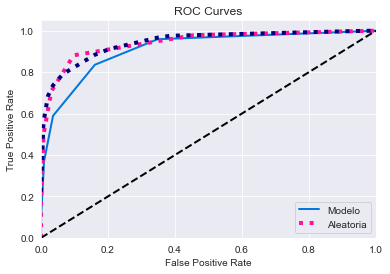

In [96]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(test_y, model.predict_proba(test_x), ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
del ax.lines[0]                 
del ax.lines[1] 
del ax.lines[1]
plt.legend(labels = ['Modelo','Aleatoria']);